In [1]:
import torch
from datasets import load_dataset
from transformers import BertTokenizer

In [2]:
dataset = load_dataset("CAIL2019-相似案例匹配", split='train')

Found cached dataset json (C:/Users/A/.cache/huggingface/datasets/json/CAIL2019-相似案例匹配-dafaae681c98ad2a/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4)


In [3]:
dataset.shape

(5102, 4)

In [4]:
type(dataset)

datasets.arrow_dataset.Dataset

In [5]:
dataset[1]

{'B': '原告：邓某1，男，汉族，1972年4月出生，住重庆市南岸区。委托代理人：张晓露，重庆永和律师事务所律师。被告：曾某1，男，汉族，1964年10月出生，住重庆市巴南区。被告：古某1，女，汉族，1963年4月出生，住重庆市江北区。被告：唐某1，女，汉族，1945年5月出生，住重庆市南岸区。被告：曾某2，女，汉族，1972年11月出生，住重庆市南岸区。被告：曾某3，女，汉族，1970年10月出生，住重庆市南岸区。\n\n邓某1诉称：2014年8月4日，曾某1、古某1因经营需要向其借款112万元，约定2014年8月7日前还款，邓某1根据借款人的要求，将111万元按照《借款协议》的要求，打入赵艳标的银行账户，现金支付了1万元给曾某1，邓某1履行了提供借款112万元的义务，但借款人没有完全履行还款义务。唐某1、曾某2及曾某3为担保人。故邓某1起诉请求判决：1．借款人曾某1、古某1共同返还借款本金112万元及支付利息，息以112万元为基数，从2014年8月4日起按中国人民银行同期同类贷款利率4倍计算至付清之日；2．被告唐某1、曾某2、曾某3对上述第1项诉讼请求承担连带支付责任；3．本案诉讼费由被告承担。曾某1、古丽君、唐某1、曾某2、曾某3均未提交书面答辩意见。经审理查明：2014年8月4日，曾某1、古某1与邓某1签订《借款协议》，约定曾某1、古某1向邓某1共同借款112万元，2014年8月7日前归还，唐某1为担保人。2014年8月31日，曾某3、曾某2与邓某1签订《保证担保合同》，约定曾某3、曾某2为112万元提供连带保证责任，担保期限为主合同履行期限届满之日后两年等。2014年8月4日，邓某1向赵艳标账户转款111万元。上述事实，有当事人陈述及《借款协议》、《保证担保合同》、工行转款凭证、南岸区人民法院受理案件通知书及材料交接清单等证据在卷佐证，事实清楚，足以认定。\n',
 'A': '原告：陈某1，女，1965年11月12日出生，汉族，住河南省沁阳市。被告：崔某1，男，1965年8月25日出生，汉族，住河南省温县，现住河南省沁阳市。被告：张某1，女，1967年6月8日出生，住河南省温县，现住河南省沁阳市。\n\n原告陈某1向本院提出诉讼请求：1、判令被告立即偿还原告本金60000元及利息（利息按月息2分计算从2018年3月22日起至还款之日止）。2、诉讼费由

In [12]:
tokenizer = BertTokenizer.from_pretrained("bert-base-chinese")
tokenizer("你好,世界")

{'input_ids': [101, 872, 1962, 117, 686, 4518, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [30]:
tokenizer(["你好,世界","我是"] ,padding=True, truncation=True, max_length=8, return_tensors="pt")['input_ids']

tensor([[ 101,  872, 1962,  117,  686, 4518,  102],
        [ 101, 2769, 3221,  102,    0,    0,    0]])

In [17]:
tokenizer.vocab_size

21128

In [20]:
tokenizer.vocab

OrderedDict([('[PAD]', 0),
             ('[unused1]', 1),
             ('[unused2]', 2),
             ('[unused3]', 3),
             ('[unused4]', 4),
             ('[unused5]', 5),
             ('[unused6]', 6),
             ('[unused7]', 7),
             ('[unused8]', 8),
             ('[unused9]', 9),
             ('[unused10]', 10),
             ('[unused11]', 11),
             ('[unused12]', 12),
             ('[unused13]', 13),
             ('[unused14]', 14),
             ('[unused15]', 15),
             ('[unused16]', 16),
             ('[unused17]', 17),
             ('[unused18]', 18),
             ('[unused19]', 19),
             ('[unused20]', 20),
             ('[unused21]', 21),
             ('[unused22]', 22),
             ('[unused23]', 23),
             ('[unused24]', 24),
             ('[unused25]', 25),
             ('[unused26]', 26),
             ('[unused27]', 27),
             ('[unused28]', 28),
             ('[unused29]', 29),
             ('[unused30]', 30),
 

In [39]:
import evaluate

accuracy = evaluate.load("accuracy")


for refs, preds in ([[0,1],[0,1]], [[1,0],[0,1]]):
    print(1)
    print(preds)
    accuracy.add_batch(references=refs, predictions=preds)
accuracy.compute()

1
[0, 1]
1
[0, 1]


{'accuracy': 0.5}

In [50]:
a = torch.tensor([[1,0],[0,1]])
b = torch.tensor([[1,1],[0,0]])
for x, y in zip(a, b):
    print(1)
    print(x, y)

1
tensor([1, 0]) tensor([1, 1])
1
tensor([0, 1]) tensor([0, 0])


In [67]:
import datasets
import torch
import torch.nn as nn
from transformers import BertTokenizer
import torch.utils.data as data
import torch.optim as optim
import evaluate
from tqdm import tqdm
import matplotlib.pyplot as plt
import sklearn
# 1 data processor

train_data = datasets.load_dataset("CAIL2019-相似案例匹配", split='train')
valid_data = datasets.load_dataset("CAIL2019-相似案例匹配", split='validation')
test_data = datasets.load_dataset("CAIL2019-相似案例匹配", split='test')

tokenizer = BertTokenizer.from_pretrained("bert-base-chinese")


def create_dataset(_set):
    text, label = [], []
    for item in _set:
        _text = item['A'] + item['B'] + item['C']
        _label = []
        if item['label'] == 'B':
            _label = [1, 0]
        else:
            _label = [0, 1]
        text.append(_text)
        label.append(_label)
    return text, label


train_data = create_dataset(train_data)

Found cached dataset json (C:/Users/A/.cache/huggingface/datasets/json/CAIL2019-相似案例匹配-dafaae681c98ad2a/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4)
Found cached dataset json (C:/Users/A/.cache/huggingface/datasets/json/CAIL2019-相似案例匹配-dafaae681c98ad2a/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4)
Found cached dataset json (C:/Users/A/.cache/huggingface/datasets/json/CAIL2019-相似案例匹配-dafaae681c98ad2a/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4)


100%|██████████| 5102/5102 [00:35<00:00, 141.90it/s]


2421
1850.437475499804


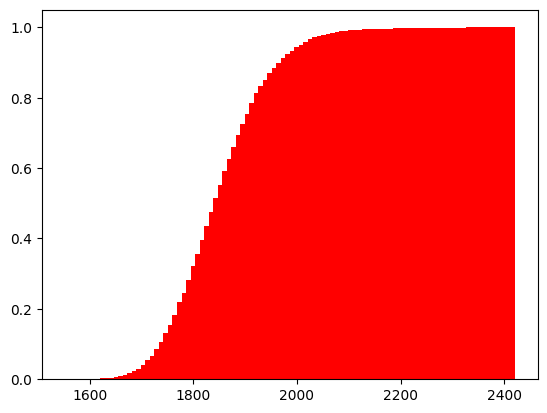

In [68]:

def show_data(data_set):
    x, y = data_set
    text_len=[len(tokenizer(_, max_length=10000)['input_ids']) for _ in tqdm(x)]
    print(max(text_len))
    print(sum(text_len)/len(text_len))
    plt.hist(text_len,bins=100,density=True,cumulative=True,color='red')
    plt.show()
show_data(train_data)

In [2]:
from transformers import pipeline

summarizer = pipeline("summarization")

summarizer(""" 原告：牛某1，男，1972年11月10日出生，汉族，无业 """)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Your max_length is set to 142, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[{'summary_text': ' 1972: 11:11:10:10日出生，10:\xa010:30:00:00    晙�:  牉:  \xa011:01:02:05:00;   11:01 :\xa011,000 : 11,000,000\xa0:\xa012,000; \xa010,000 more: \xa0\xa0- \xa0- 11:000 \xa0: "I am happy to have a happy ending"'}]

In [ ]:
from transformers import PegasusForConditionalGeneration
# Need to download tokenizers_pegasus.py and other Python script from Fengshenbang-LM github repo in advance,
# or you can download tokenizers_pegasus.py and data_utils.py in https://huggingface.co/IDEA-CCNL/Randeng_Pegasus_523M/tree/main
# Strongly recommend you git clone the Fengshenbang-LM repo:
# 1. git clone https://github.com/IDEA-CCNL/Fengshenbang-LM
# 2. cd Fengshenbang-LM/fengshen/examples/pegasus/
# and then you will see the tokenizers_pegasus.py and data_utils.py which are needed by pegasus model

from tokenizers_pegasus import PegasusTokenizer

model = PegasusForConditionalGeneration.from_pretrained("IDEA-CCNL/Randeng-Pegasus-238M-Summary-Chinese")
tokenizer = PegasusTokenizer.from_pretrained("IDEA-CCNL/Randeng-Pegasus-238M-Summary-Chinese")

text = "在北京冬奥会自由式滑雪女子坡面障碍技巧决赛中，中国选手谷爱凌夺得银牌。祝贺谷爱凌！今天上午，自由式滑雪女子坡面障碍技巧决赛举行。决赛分三轮进行，取选手最佳成绩排名决出奖牌。第一跳，中国选手谷爱凌获得69.90分。在12位选手中排名第三。完成动作后，谷爱凌又扮了个鬼脸，甚是可爱。第二轮中，谷爱凌在道具区第三个障碍处失误，落地时摔倒。获得16.98分。网友：摔倒了也没关系，继续加油！在第二跳失误摔倒的情况下，谷爱凌顶住压力，第三跳稳稳发挥，流畅落地！获得86.23分！此轮比赛，共12位选手参赛，谷爱凌第10位出场。网友：看比赛时我比谷爱凌紧张，加油！"
inputs = tokenizer(text, max_length=1024, return_tensors="pt")

# Generate Summary
summary_ids = model.generate(inputs["input_ids"])
tokenizer.batch_decode(summary_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

# model Output: 滑雪女子坡面障碍技巧决赛谷爱凌获银牌
